In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import os
import math
import datetime

In [2]:
# Importing sample data
table = pd.read_excel('samples.xlsx')
table

,sample,date dep,date meas,dry period,dep buffer,dep buffer ph,dep buffer conc,meas buffer,meas buffer conc,ph,...,slope up err,R^2 up,slope down,slope down err,R^2 down,average slope,average err,j0,j0 err,done
0,A1,2018-05-15,2018-05-17,2,KPi,7.0,0.1,KPi,0.1,7.000,...,1.073628,0.999279,66.737719,0.833842,0.998558,72.636117,0.658552,NaN,NaN,1
1,A2,2018-05-15,2018-05-15,0,KPi,7.0,0.1,KPi,0.1,7.000,...,1.038934,0.999221,67.341971,0.644707,0.999240,70.697992,0.547804,NaN,NaN,1
2,A3,2018-05-15,2018-05-17,2,KPi,7.0,0.1,KPi,0.1,7.000,...,0.964045,0.999373,66.536542,0.851575,0.998559,73.180550,0.638232,NaN,NaN,1
3,A4,2018-05-15,2018-05-15,0,KPi,7.0,0.1,KPi,0.1,7.000,...,0.879226,0.999408,65.850748,0.527217,0.999433,69.092499,0.452157,NaN,NaN,1
4,B1,2018-05-31,2018-06-02,2,KPi,7.0,0.1,B(OH)3 + NaOH,0.1,7.053,...,2.040001,0.998601,67.099455,3.031681,0.991174,71.890915,1.692503,NaN,NaN,1
5,B2,2018-05-31,2018-06-02,2,KPi,7.0,0.1,B(OH)3 + NaOH,0.1,7.053,...,inf,1.000000,151.775432,29.355865,0.965910,132.788256,NaN,NaN,NaN,1
6,B3,2018-05-31,2018-06-02,2,KPi,7.0,0.1,B(OH)3 + NaOH,0.1,7.053,...,0.994188,0.999810,54.094577,0.650866,0.999718,57.087821,0.544549,NaN,NaN,1
7,B4,2018-05-31,2018-06-02,2,KPi,7.0,0.1,B(OH)3 + NaOH,0.1,7.053,...,inf,1.000000,64.851279,0.927927,0.999509,94.008679,NaN,NaN,NaN,1
8,C1,2018-07-06,2018-07-09,3,KPi,7.0,0.1,B(OH)3 + KOH,0.1,9.200,...,0.672442,0.999444,56.202588,0.450272,0.999720,58.301542,0.374141,NaN,NaN,1
9,C2,2018-07-06,2018-07-09,3,KPi,7.0,0.1,B(OH)3 + KOH,0.1,9.200,...,0.958516,0.999086,52.577910,0.244545,0.999954,53.103362,0.236955,NaN,NaN,1


In [3]:
### Enter start and stop indices of runs to plot later:
runs = {
    1: [35, 44, str(table['date meas'][35].strftime('%d.%m.'))],
    2: [45, 55, str(table['date meas'][45].strftime('%d.%m.'))],
    3: [55, 67, str(table['date meas'][55].strftime('%d.%m.'))],
    4: [67, 75, str(table['date meas'][67].strftime('%d.%m.'))],
    5: [75, 77, str(table['date meas'][75].strftime('%d.%m.'))],
    6: [77, 79, str(table['date meas'][77].strftime('%d.%m.'))],
    7: [79, 81, str(table['date meas'][79].strftime('%d.%m.'))],
    8: [81, 82, str(table['date meas'][81].strftime('%d.%m.'))]
}

### Enter start and stop indices of runs to calculate mean slopes
allruns = [35, 82]

### Exclude outliers
outliers = [44]

# a list of rows to evaluate
allruns = list(np.arange(allruns[0], allruns[1]))
allruns.remove(outliers)


# Von diesen Einträgen kopiere ich die Tafel slopes in ein dictionary
slopes = {
    7.2: [],
    7.6: [],
    8.0: [],
    8.4: [],
    8.8: [],
    9.2: [],
    9.6: [],
    10.0: [],
    10.4: [],
    10.8: [],
    11.2: [],
    11.6: []
}

j0s = {
    7.2: [],
    7.6: [],
    8.0: [],
    8.4: [],
    8.8: [],
    9.2: [],
    9.6: [],
    10.0: [],
    10.4: [],
    10.8: [],
    11.2: [],
    11.6: []
}

for i in allruns:
    if not (np.isnan(table['slope up'][i]) and np.isnan(table['slope up'][i])):
        slopes[table['ph'][i]] += [[table['slope up'][i], table['slope up err'][i]],
                                   [table['slope down'][i], table['slope down err'][i]]]
        j0s[table['ph'][i]] += [[table['j0'][i], table['j0 err'][i]]]

In [4]:
# Ich errechne ein gewichtetes Mittel der Tafel slopes für jeden pH und eine (ungewichtete) Standardabweichung
# einmal für alle und einmal für up und down getrennt
means = []
meansup = []
meansdown = []
meanj0 = []

errors = []
errorsup = []
errorsdown = []
j0err = []

ph = list(slopes.keys())
ph.sort()

for i in ph:
    means.append(np.average(np.array(slopes[i])[:, 0], weights=np.array(slopes[i])[:, 1]))
    errors.append(np.std(np.array(slopes[i])[:, 0], ddof=1))
    meansup.append(np.average(np.array(slopes[i])[::2, 0], weights=np.array(slopes[i])[::2, 1]))
    errorsup.append(np.std(np.array(slopes[i])[::2, 0], ddof=1))
    meansdown.append(np.average(np.array(slopes[i])[1::2, 0], weights=np.array(slopes[i])[1::2, 1]))
    errorsdown.append(np.std(np.array(slopes[i])[1::2, 0], ddof=1))
    meanj0.append(np.average(np.array(j0s[i])[:, 0], weights=np.array(j0s[i])[:, 1]))
    j0err.append(np.std(np.array(j0s[i])[:, 1], ddof=1))

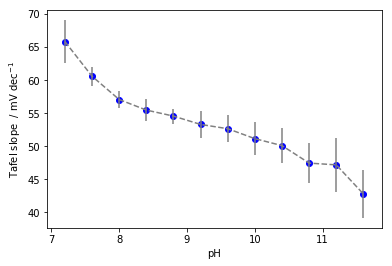

In [33]:
# und erstelle einen Plot
plt.errorbar(ph, means, yerr=errors, ls='--', marker='', color='grey')
plt.scatter(ph, means, marker='o', color='blue')

plt.xlabel('pH')
plt.ylabel(r'Tafel slope  / mV dec$^{{-1}}$')
#plt.title('Tafel slope weighted means')
#plt.grid()

plt.savefig('plots/*slope_vs_ph/slopes_weighted_means.png', dpi=300)
plt.show()
plt.close()

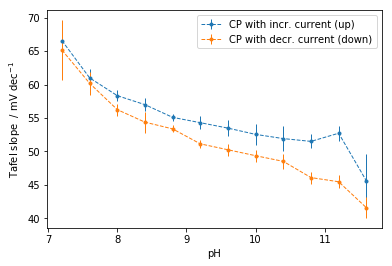

In [32]:
# und einen für up und down slopes separat
plt.errorbar(ph, meansup, yerr=errorsup, ls='--', lw=1, marker='.', label='CP with incr. current (up)')
plt.errorbar(ph, meansdown, yerr=errorsdown, ls='--', lw=1, marker='.', label='CP with decr. current (down)')

plt.xlabel('pH')
plt.ylabel(r'Tafel slope  / mV dec$^{{-1}}$')
#plt.title('CP with increasing and decreasing current')

plt.legend()
#plt.grid()
plt.savefig('plots/*slope_vs_ph/slopes_updown_means.png', dpi=300)
plt.show()
plt.close()

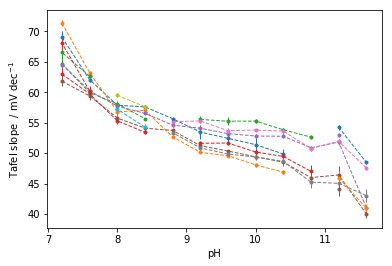

In [31]:
# Und einen für alle runs
fig, ax = plt.subplots()

for i in runs.keys():
    ax.errorbar(table['ph'][runs[i][0]:runs[i][1]], table['slope up'][runs[i][0]:runs[i][1]],
                 table['slope up err'][runs[i][0]:runs[i][1]], ls='--', marker='.', lw=1, label=runs[i][2]+ '  (up)')
    ax.errorbar(table['ph'][runs[i][0]:runs[i][1]], table['slope down'][runs[i][0]:runs[i][1]],
                 table['slope down err'][runs[i][0]:runs[i][1]], ls='--', marker='.', lw=1, label=runs[i][2]+ '  (down)')

ax.set_xlabel('pH')
ax.set_ylabel(r'Tafel slope  / mV dec$^{{-1}}$')
#ax.set_title('Tafel slopes')
    
#box = ax.get_position()
#ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
#ax.legend(fontsize='small', loc='upper left', bbox_to_anchor=(1,1))

plt.savefig('plots/*slope_vs_ph/all_slopes1.png', dpi=300)
plt.show()
plt.close()

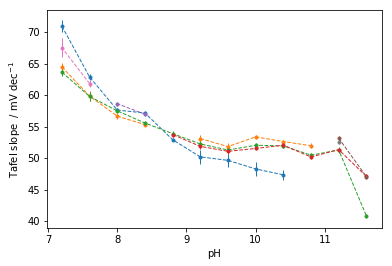

In [30]:
# und einen für die separaten runs
fig, ax = plt.subplots()

for i in runs.keys():
    ax.errorbar(table['ph'][runs[i][0]:runs[i][1]], table['average slope'][runs[i][0]:runs[i][1]],
                 table['slope up err'][runs[i][0]:runs[i][1]], ls='--', marker='.', lw=1, label=runs[i][2])

ax.set_xlabel('pH')
ax.set_ylabel(r'Tafel slope  / mV dec$^{{-1}}$')
#ax.set_title('Separate measurements (up and down averaged)')
    
#ax.legend()

plt.savefig('plots/*slope_vs_ph/all_runs.png', dpi=300)
plt.show()
plt.close()

In [9]:
# saving data
data = pd.DataFrame({'ph': ph, 'slope': means, 'error': errors})
data['%'] = data['error'] / data['slope'] * 100
data.to_csv('slope_means.csv')
data

,error,ph,slope,%
0,3.227978,7.2,65.833591,4.903239
1,1.462827,7.6,60.590839,2.414270
2,1.344438,8.0,57.071684,2.355701
3,1.664868,8.4,55.477739,3.000967
4,1.137674,8.8,54.565590,2.084966
5,2.088508,9.2,53.305653,3.917987
6,2.010875,9.6,52.659940,3.818604
7,2.486926,10.0,51.156345,4.861422
8,2.619739,10.4,50.101849,5.228828
9,3.053374,10.8,47.457283,6.433941


In [6]:
# Und ein vergleich von mehreren pH Werten in einem Tafel plot
fitpoints = pd.read_csv('scripts/tafelpoints.csv', header=0, index_col=0)

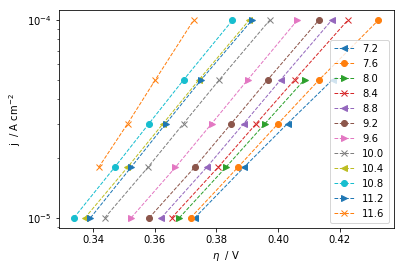

In [7]:
punkte = {
    55: '<',
    56: 'o',
    57: '>',
    58: 'x',
    59: '<',
    60: 'o',
    61: '>',
    62: 'x',
    63: '<',
    64: 'o',
    65: '>',
    66: 'x'
}

for i in range(55, 67):
    plt.errorbar(fitpoints.loc[table['sample'][i] + 'x',:].iloc[-1], fitpoints.loc[table['sample'][i] + 'y',:].iloc[-1],
                 ls='--', lw=1, marker=punkte[i], label=table['ph'][i])
plt.legend()
plt.xlabel(r'$\eta$  / V')
plt.ylabel(r'j  / A cm$^{{-2}}$')
plt.yscale('log')
#plt.title('Tafel plot for different pH values')

plt.savefig('plots/*slope_vs_ph/all_tafel_plots.png', dpi=300)
plt.show()

In [8]:
meanj0 = np.array(meanj0) * 1e12
j0err = np.array(j0err) * 1e12

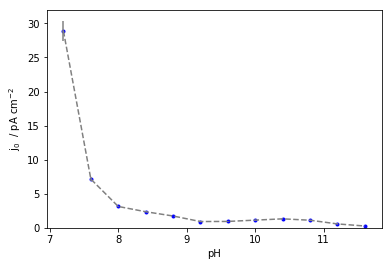

In [22]:
# j0 vs pH plotten

plt.errorbar(ph, meanj0, yerr=j0err, ls='--', marker='', color='grey')
plt.scatter(ph, meanj0, marker='.', color='blue')
#plt.axhline(0, color='grey', lw=1)

plt.xlabel('pH')
plt.ylabel(r'j$_0$  / pA cm$^{{-2}}$')
#plt.title('Exchange Current vs. pH')
plt.ylim(bottom=0)

#plt.grid()
#plt.yscale('log')
plt.savefig('plots/*slope_vs_ph/j0_vs_ph.png', dpi=300)
plt.show()